# Homework 5 - Analytical Programming.

**By -** Tushar Ahuja

---

**Objective**

The goal of this assignment is to practice data cleaning using Python and Pandas. You will work with a real-world dataset to identify and handle common data quality issues such as missing values, duplicates, and incorrect data types.

**Background**

The sinking of the Titanic is one of the most tragic and well-known maritime disasters. While luck played a role in survival, data suggests that factors like age, gender, and socio-economic status significantly influenced a passenger's chances of survival.

In this assignment, we aim to explore the question: "What kinds of people were more likely to survive?" To do this, we will first focus on cleaning the Titanic passenger dataset, which includes features such as name, age, gender, and class, preparing it for further analysis and modeling.

**Requirements**
1. Remove any duplicate entries in the dataset. The PassengerId column can be used as a unique identifier for each passenger.

2. Backfill missing values in the Age column using the median of the existing ages.

3. Create a scatter plot with the Fare on the x-axis and Age on the y-axis. This will help you visualize the relationship between passenger fare and age.

4. Calculate and display the survival rate for each passenger class (Pclass).

5. Calculate and display the survival rate for each gender.

---

## A. Reading the CSV file

The Titanic dataset offers a glimpse into the passengers aboard the ill-fated ship. By analyzing variables such as age, gender, and class, we can uncover patterns that influenced survival outcomes. This analysis serves as a foundation for data cleaning and further predictive modeling.

In [11]:
import pandas as pd

# Adding the local file path that is to be loaded from my location
file_path = '/Users/tusharahuja/Documents/Analytic Pg/titanic.csv'

# Reading the CSV file
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S


#### Code Explanation:

* **Importing Library:** The pandas library is imported to handle data operations.

* **File Path Setup:** The Titanic dataset's location is stored in the file_path variable for easy access.

* **Loading Dataset:** The pd.read_csv(file_path) command reads the CSV file into a DataFrame (stored as df), making the data ready for analysis.

* **Displaying Data:** The df.head() function shows the first five rows of the dataset, providing a quick glimpse of the structure and content.

* **Next Steps:** After loading, further steps would involve cleaning and exploring the dataset to analyze survival trends.

## B. Understanding the Dataset Dimensions: Total Row and Column Count

By using df.shape, we can quickly determine the total number of rows and columns in the dataset. This function returns a tuple, where the first value indicates the number of rows (data entries) and the second value represents the number of columns (features or variables). This is an essential step in assessing the size and scope of the dataset for further analysis.

In [13]:
df.shape

(901, 12)

#### Code Explanation:

* **Dataset Dimension Check:** The df.shape function returns a tuple representing the dimensions of the dataset. It shows the number of rows and columns in the DataFrame.

* **Usage:** This is useful for quickly understanding the dataset's size, helping you assess how much data you're working with before proceeding with analysis. For example, (901, 12) means 901 rows and 12 columns.

## C. Remove any duplicate entries in the dataset.
[Note:- The PassengerId column can be used as a unique identifier for each passenger (Given).]

In [15]:
# Removing duplicate entries based on the PassengerId column
df_cleaned = df.drop_duplicates(subset='PassengerId')

# Displaying the first few rows of the cleaned dataframe
df_cleaned.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S


#### Code Explanation:

* **Removing Duplicates:** The df.drop_duplicates(subset='PassengerId') function is used to remove duplicate rows from the dataset, considering PassengerId as a unique identifier. This ensures that each passenger appears only once in the cleaned dataset (df_cleaned).

* **Subset Specification:** By specifying subset='PassengerId', only the PassengerId column is considered for identifying duplicates, leaving other columns unchanged.

* **Displaying Cleaned Data:** The df_cleaned.head() function shows the first few rows of the cleaned dataset to verify that duplicates were removed successfully.


## D. Verifying Dataset Size After Removing Duplicates: Total Row and Column Count

After eliminating duplicate entries, it's important to reassess the dataset size. By using the df_cleaned.shape function, you can check the total number of rows and columns that remain. This ensures that the dataset is clean and ready for further analysis without any redundant or duplicated data entries.

In [17]:
df_cleaned.shape

(891, 12)

#### Code Explanation:

* **Dataset Dimension Check:** The df.shape function returns a tuple representing the dimensions of the dataset. It shows the number of rows and columns in the DataFrame.

* **Usage:** This is useful for quickly understanding the dataset's size, helping you assess how much data you're working with before proceeding with analysis. For example, (891, 12) means 891 rows and 12 columns.

## E. Identifying and Listing Removed Duplicates

To ensure data integrity, it is crucial to identify and review the duplicates that were removed from the dataset. By using a method to filter and display these entries prior to cleaning, you can gain insights into any potential data issues. This process helps maintain transparency in data cleaning efforts and allows for a better understanding of the dataset's structure.

In [19]:
# Identifying duplicates based on PassengerId
duplicates = df[df.duplicated(subset='PassengerId', keep=False)]

# Display the duplicate entries
print("Duplicate entries:")
duplicates


Duplicate entries:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
797,798,1,3,"Osman, Mrs. Mara",F,31.0,0,0,349244,8.6833,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S


#### Code Explanation:

* **Identifying Duplicates:** The line duplicates = df[df.duplicated(subset='PassengerId', keep=False)] identifies duplicate entries in the dataset based on the PassengerId column. The duplicated() function returns a boolean Series, indicating whether each row is a duplicate.

* **subset='PassengerId':** This specifies that the check for duplicates should only consider the PassengerId column.
keep=False: This argument ensures that all instances of duplicate entries are marked as True, allowing us to capture every occurrence of duplicates.

* **Displaying Duplicate Entries:** The print("Duplicate entries:") statement outputs a header message to the console, followed by the variable duplicates, which contains all rows that were identified as duplicates. This allows us to review the duplicate records before any cleaning operations are performed.

This step is essential for maintaining data quality, as it helps us understand which entries were duplicated, facilitating informed decisions about how to handle them.

## F. Calculating the Median Age: Understanding Central Tendency in Passenger Data

Determining the median age of passengers is a crucial step in analyzing the dataset. The median provides a measure of central tendency, helping to understand the typical age of individuals aboard the Titanic. By calculating this value, we can effectively address any missing data in the Age column and gain insights into the demographics of the passengers.

In [22]:
# Calculating the median of the Age column
age_median = df_cleaned['Age'].median()
age_median

28.0

#### Code Explanation:

* **Calculating the Median:** The line age_median = df_cleaned['Age'].median() calculates the median value of the Age column in the cleaned DataFrame (df_cleaned). The median() function computes the middle value when the ages are sorted in ascending order.

* **Storing the Result:** The calculated median age is stored in the variable age_median, which can be used later for filling missing values or for further analysis.

* **Understanding the Median:** The median is a robust measure of central tendency, less affected by outliers than the mean. By focusing on the median age, we can gain a clearer understanding of the typical age of passengers on the Titanic, facilitating a more accurate analysis of survival rates and demographic patterns.

This step is essential in preparing the dataset for further analysis, especially when addressing missing values in the Age column.

## G. Filling Missing Values in the Age Column with the Median

To enhance the dataset's integrity and ensure comprehensive analysis, we will fill the missing values in the Age column using the previously calculated median age. This approach helps maintain the overall distribution of the data while preventing loss of information due to missing entries. By doing so, we can ensure that our analysis reflects a more complete view of the passenger demographics.

In [24]:
# Fill missing values in the Age column with the median value
df_cleaned['Age'].fillna(age_median, inplace=True)

# Displaying the first few rows to verify changes
df_cleaned


/var/folders/rn/mjv0rnm53b72ykwx9qvn64nm0000gn/T/ipykernel_3464/4120481977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(age_median, inplace=True)
/var/folders/rn/mjv0rnm53b72ykwx9qvn64nm0000gn/T/ipykernel_3464/4120481977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'].fillna(age_median, inp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Code Explanation:

* **Filling Missing Values:** The line df_cleaned['Age'].fillna(age_median, inplace=True) fills any missing values (NaN) in the Age column with the calculated median age stored in the age_median variable. The fillna() function is used here to replace the missing entries.

* **inplace=True:** This argument modifies the existing DataFrame (df_cleaned) directly, ensuring that the changes are applied without needing to create a new DataFrame.

* **Verifying Changes:** The statement df_cleaned at the end displays the updated DataFrame, allowing us to visually inspect the first few rows and confirm that missing age values have been successfully replaced with the median.

By filling missing values with the median, we preserve the dataset's structure while minimizing the impact of incomplete data, enabling more accurate analyses and insights in subsequent steps.

## H. Visualizing the Relationship Between Fare and Age: Scatter Plot Analysis

Creating a scatter plot to visualize the relationship between passenger fare and age allows us to identify potential trends and patterns within the data. By plotting Fare on the x-axis and Age on the y-axis, we can explore how these two variables interact, revealing insights into the demographics of passengers who paid different fare amounts. This visualization aids in understanding the influence of age on ticket pricing and survival outcomes, facilitating a deeper analysis of the dataset.

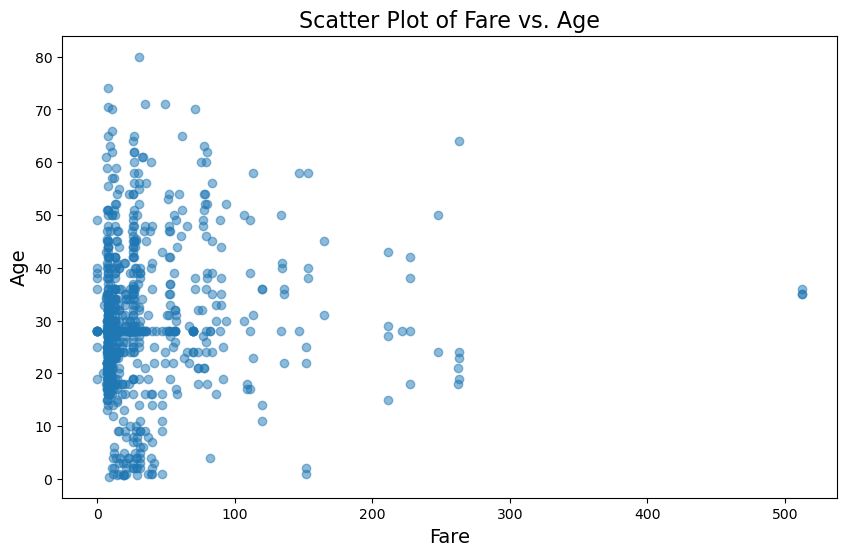

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot with Fare on the x-axis and Age on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Fare'], df_cleaned['Age'], alpha=0.5)

# Add labels and a title to the plot
plt.title('Scatter Plot of Fare vs. Age', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Show the plot
plt.show()


#### Code Explanation:

* **Importing Matplotlib:** The code starts by importing the matplotlib.pyplot module as plt, which is a widely used library for creating static, animated, and interactive visualizations in Python.

* **Creating a Figure:** The line plt.figure(figsize=(10, 6)) initializes a new figure for the plot with a specified size of 10 inches wide by 6 inches tall. This ensures that the scatter plot is adequately sized for visualization.

* **Creating the Scatter Plot:** The command plt.scatter(df_cleaned['Fare'], df_cleaned['Age'], alpha=0.5) generates the scatter plot with Fare plotted on the x-axis and Age on the y-axis. The alpha=0.5 parameter adds transparency to the points, helping to mitigate overlap and improve visibility in areas with many data points.

* **Adding Titles and Labels:**

       * plt.title('Scatter Plot of Fare vs. Age', fontsize=16): This sets the title of the plot, which provides context for the      visualization.
       * plt.xlabel('Fare', fontsize=14): This labels the x-axis as "Fare," indicating what data is represented.
       * plt.ylabel('Age', fontsize=14): This labels the y-axis as "Age," clarifying the variable plotted.
       * Displaying the Plot: Finally, the command plt.show() renders the scatter plot on the screen, allowing for visual analysis of the relationship between fare and age among the passengers.

This visualization is an important step in exploring data relationships, helping to identify trends and patterns that may inform further analysis.

## I. Analyzing Survival Rate: Insights into Passenger Outcomes

Calculating the survival rate among passengers is crucial for understanding the factors that influenced survival during the Titanic disaster. By examining the proportion of survivors compared to the total number of passengers, we can gain valuable insights into demographic trends and characteristics associated with higher survival rates. This analysis serves as a foundation for further exploration into the impacts of variables such as age, gender, and class on survival outcomes.

In [36]:
# Calculating survival rate for each passenger class
survival_rate_class = df_cleaned.groupby('Pclass')['Survived'].mean()*100

# Displaying the survival rate for each class
print("Survival rate for each passenger class:")
print(survival_rate_class)


Survival rate for each passenger class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [38]:
set(df['Sex'])

{'F', 'M', 'female', 'male'}

#### Code Explanation:

* **Calculating Survival Rate by Class:** The line survival_rate_class = df_cleaned.groupby('Pclass')['Survived'].mean() calculates the survival rate for each passenger class. Here’s how it works:

* **df_cleaned.groupby('Pclass'):** This groups the DataFrame by the Pclass column, creating separate subsets for each class of passengers (1st, 2nd, and 3rd).

* **['Survived'].mean():** For each group, it computes the mean of the Survived column, where survival is typically represented as 1 (survived) and 0 (did not survive). The mean value thus represents the proportion of passengers who survived in each class.

* **Displaying the Results:** The print("Survival rate for each passenger class:") statement provides a clear message indicating what is being displayed. The subsequent print(survival_rate_class) outputs the calculated survival rates for each passenger class.

This step is essential for understanding how passenger class influenced survival chances, allowing for deeper analysis of socio-economic factors during the Titanic tragedy. By analyzing these survival rates, we can uncover patterns that highlight disparities in survival based on class.


## J. Examining Survival Rate by Gender: Insights into Demographic Impact
Analyzing the survival rate by gender provides valuable insights into the factors influencing survival during the Titanic disaster. By comparing the proportions of male and female passengers who survived, we can better understand the role of gender in survival outcomes. This analysis highlights potential social and cultural dynamics at play during the incident, offering a clearer picture of how demographic characteristics affected survival rates.

In [43]:
# Calculate survival rate for each gender
survival_rate_gender = df_cleaned.groupby('Sex')['Survived'].mean()*100

# Display the survival rate for each gender
print("Survival rate for each gender:")
print(survival_rate_gender)


Survival rate for each gender:
Sex
F         83.333333
M         14.285714
female    74.025974
male      18.947368
Name: Survived, dtype: float64


#### Code Explanation:

* **Calculating Survival Rate by Gender:** The line survival_rate_gender = df_cleaned.groupby('Sex')['Survived'].mean() computes the survival rate for each gender in the dataset. Here's a breakdown of how it works:

* **df_cleaned.groupby('Sex'):** This groups the DataFrame by the Sex column, creating separate subsets for male and female passengers.
['Survived'].mean(): For each gender group, it calculates the mean of the Survived column, where 1 indicates survival and 0 indicates non-survival. The mean value thus represents the proportion of survivors within each gender.

* **Displaying the Results:** The statement print("Survival rate for each gender:") provides context for the output that follows. The subsequent print(survival_rate_gender) displays the calculated survival rates for both male and female passengers.

This step is crucial for understanding the impact of gender on survival during the Titanic tragedy. By comparing survival rates between genders, we can gain insights into societal norms and behaviors that may have influenced the outcomes of the disaster.

### Standardizing Gender Values and Recalculating Survival Rates by Gender

In [46]:
# Standardizing the gender values
df_cleaned['Sex'] = df_cleaned['Sex'].replace({'F': 'female', 'M': 'male'})

# Calculating survival rate for each gender again
survival_rate_per_gender = df_cleaned.groupby('Sex')['Survived'].mean()*100

# Displaying the updated survival rate for each gender
print("Updated survival rate for each gender:")
print(survival_rate_per_gender)


Updated survival rate for each gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


/var/folders/rn/mjv0rnm53b72ykwx9qvn64nm0000gn/T/ipykernel_3464/1704156110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sex'] = df_cleaned['Sex'].replace({'F': 'female', 'M': 'male'})


#### Code Explanation:

* **Standardizing Gender Values:** The line df_cleaned['Sex'] = df_cleaned['Sex'].replace({'F': 'female', 'M': 'male'}) is used to standardize the gender values in the Sex column. This replaces the shorthand representations ('F' and 'M') with their full forms ('female' and 'male'). This step ensures consistency in the data, making it easier to analyze and interpret.

* **Calculating Survival Rate by Gender Again:** The line survival_rate_per_gender = df_cleaned.groupby('Sex')['Survived'].mean() recalculates the survival rate for each gender using the standardized values. The groupby() function groups the DataFrame by the updated Sex values, and the mean() function calculates the proportion of survivors for each group.

* **Displaying the Updated Results:** The statement print("Updated survival rate for each gender:") provides context for the output that follows. The subsequent print(survival_rate_per_gender) displays the newly calculated survival rates for both standardized gender categories.

This step enhances data clarity and consistency, ensuring that analyses accurately reflect the survival rates for each gender category. By standardizing the values, we can avoid confusion and make it easier to interpret the results of the analysis.